In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

In [2]:
# Load the saved model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Initialize the model and modify the fully connected layer
resnet50 = models.resnet50(pretrained=False)
resnet50.fc = torch.nn.Sequential(
    torch.nn.Linear(resnet50.fc.in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 35),  # Replace 35 with the number of classes in your model
    torch.nn.Softmax(dim=1)
)
resnet50.load_state_dict(torch.load('resnet50_fmodel.pth'))
resnet50 = resnet50.to(device)
resnet50.eval()  # Set the model to evaluation mode

c:\Users\amrit\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\amrit\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\amrit\AppData\Local\Temp\ipykernel_3144\1115060100.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future re

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [50]:
# Path to your custom image
image_path = r'Indian\train\R\3.jpg'

In [51]:
# Define the transformations to preprocess the image
custom_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [52]:
# Load and preprocess the image
image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB format
input_tensor = custom_transform(image).unsqueeze(0).to(device)  # Add batch dimension

In [53]:
# Perform inference
with torch.no_grad():
    output = resnet50(input_tensor)  # Get the predictions
    _, predicted_idx = torch.max(output, 1)  # Get the index of the highest probability

In [54]:
# Map the predicted index to the corresponding class label
class_names = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']  # Replace with your actual class names
class_label = class_names[predicted_idx.item()]

In [55]:
print(f"Predicted Class: {class_label}")

Predicted Class: R


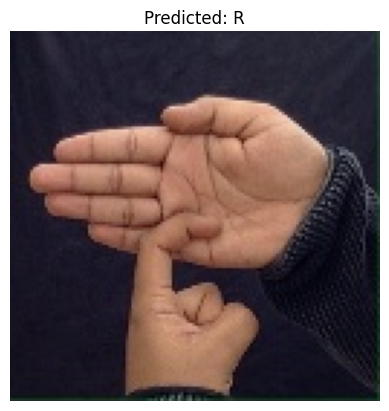

In [56]:
# Optional: Display the image with the prediction
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(f'Predicted: {class_label}')
plt.axis('off')
plt.show()